In [55]:
import requests
from bs4 import BeautifulSoup
from time import sleep

In [75]:
#allsides,com has three pages
pages={
    'https://www.allsides.com/media-bias/media-bias-ratings',
    'https://www.allsides.com/media-bias/media-bias-ratings?page=1',
    'https://www.allsides.com/media-bias/media-bias-ratings?page=2'
}

In [76]:
def get_agreeance_text(ratio):
    if ratio>3 : return "absolutely agrees"
    elif 2<ratio<=3: return "strongly agrees"
    elif 1.5<ratio<=2: return "agrees"
    elif 1<ratio<=1.5: return "somewhat agrees"
    elif ratio == 1: return "neutral"
    elif 0.67<ratio<1: return "somewhat disagrees"
    elif 0.5<ratio<=0.67: return "disagrees"
    elif 0.33<ratio<=0.5: return "strongly disagrees"
    elif ratio<=0.33: return "absolutely disagrees"
    else: return None

In [53]:
data = []

for page in pages:
    r = requests.get(page)
    soup = BeautifulSoup(r.content,'html.parser')
    rows = soup.select('tbody tr')
    
    for row in rows:
        d = dict()
    
        d['name'] = row.select_one('.source-title').text.strip()
        d['allsides_page'] = 'https://www.allsides.com' + row.select_one('.source-title a')['href']
        d['bias'] = row.select_one('.views-field-field-bias-image a')['href'].split('/')[-1]
        d['agree'] = int(row.select_one('.agree').text)
        d['disagree'] = int(row.select_one('.disagree').text)
        d['agree_ratio'] = d['agree']/d['disagree']
        d['agreeance_text'] = get_agreeance_text(d['agree_ratio'])
    
        data.append(d)

    sleep(10)
    
print(data[0])

{'name': 'ABC News', 'allsides_page': 'https://www.allsides.com/news-source/abc-news-media-bias', 'bias': 'left-center', 'agree': 8593, 'disagree': 6781, 'agree_ratio': 1.267217224598142, 'agreeance_text': 'somewhat agrees'}


In [62]:
from tqdm import tqdm_notebook
from copy import deepcopy

for d in tqdm_notebook(data):
    r = requests.get(d['allsides_page'])
    soup = BeautifulSoup(r.content,'html.parser')
    
    try:
        website = soup.select_one('.www')['href']
        d['website'] = website
    except TypeError:
        pass

HBox(children=(IntProgress(value=0, max=265), HTML(value='')))

In [64]:
import json

with open('allsides.json','w') as f:
    json.dump(data, f)
    
with open('allsides.json','r') as f:
    data = json.load(f)
    
print(data[0])

{'name': 'ABC News', 'allsides_page': 'https://www.allsides.com/news-source/abc-news-media-bias', 'bias': 'left-center', 'agree': 8593, 'disagree': 6781, 'agree_ratio': 1.267217224598142, 'agreeance_text': 'somewhat agrees', 'website': 'http://abcnews.go.com/'}


In [69]:
abs_agree = [d for d in data if d['agreeance_text'] ==  'absolutely agrees' ]

print(f"{'Outlet':<20} {'Bias':<20}")
print("-"*30)

for d in abs_agree:
    print(f"{d['name']:<20} {d['bias']:<20}")

Outlet               Bias                
------------------------------
C-SPAN               center              
Current Affairs      left                
InfoWars             right               
The Daily Signal     right               
Vice                 left                
Jacobin              left                
Mashable             left                
Mother Jones         left                
PoliticusUSA         left                
Red State            right               
RollingStone.com     left                


In [70]:
import pandas as pd

df = pd.read_json(open('allsides.json','r'))

df.set_index('name',inplace=True)

df.head()

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,website
name,,,,,,,
ABC News,8593,1.267217,somewhat agrees,https://www.allsides.com/news-source/abc-news-...,left-center,6781,http://abcnews.go.com/
Al Jazeera,2080,0.690342,somewhat disagrees,https://www.allsides.com/news-source/al-jazeer...,center,3013,NaN
AllSides,2724,2.508287,strongly agrees,https://www.allsides.com/news-source/allsides-0,allsides,1086,http://www.allsides.com
AllSides Community,1815,1.669733,agrees,https://www.allsides.com/news-source/allsides-...,allsides,1087,NaN
AlterNet,1262,2.210158,strongly agrees,https://www.allsides.com/news-source/alternet,left,571,http://www.alternet.org/


In [72]:
df['total_votes'] = df['agree'] + df['disagree']
df.sort_values('total_votes',ascending=False, inplace=True)

df.head(10)

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,website,total_votes
name,,,,,,,,
CNN (Web News),23135,0.971120,somewhat disagrees,https://www.allsides.com/news-source/cnn-media...,left-center,23823,http://www.cnn.com,46958
Fox News,17651,0.653547,disagrees,https://www.allsides.com/news-source/fox-news-...,right-center,27008,http://www.foxnews.com/,44659
Washington Post,21558,1.677665,agrees,https://www.allsides.com/news-source/washingto...,left-center,12850,http://www.washingtonpost.com/regional,34408
New York Times - News,12413,0.571922,disagrees,https://www.allsides.com/news-source/new-york-...,left-center,21704,http://www.nytimes.com/,34117
HuffPost,15281,0.840955,somewhat disagrees,https://www.allsides.com/news-source/huffpost-...,left,18171,http://www.huffingtonpost.com/,33452
Politico,11190,0.600870,disagrees,https://www.allsides.com/news-source/politico-...,left-center,18623,http://www.politico.com/,29813
Washington Times,19028,2.012267,strongly agrees,https://www.allsides.com/news-source/washingto...,right-center,9456,http://www.washingtontimes.com/,28484
NPR News,15937,1.471968,somewhat agrees,https://www.allsides.com/news-source/npr-media...,center,10827,http://www.npr.org/,26764
Wall Street Journal - News,9988,0.629641,disagrees,https://www.allsides.com/news-source/wall-stre...,center,15863,http://online.wsj.com/,25851


In [74]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

df2 = df.head(25).copy()

df2.head()

,agree,agree_ratio,agreeance_text,allsides_page,bias,disagree,website,total_votes
name,,,,,,,,
CNN (Web News),23135,0.971120,somewhat disagrees,https://www.allsides.com/news-source/cnn-media...,left-center,23823,http://www.cnn.com,46958
Fox News,17651,0.653547,disagrees,https://www.allsides.com/news-source/fox-news-...,right-center,27008,http://www.foxnews.com/,44659
Washington Post,21558,1.677665,agrees,https://www.allsides.com/news-source/washingto...,left-center,12850,http://www.washingtonpost.com/regional,34408
New York Times - News,12413,0.571922,disagrees,https://www.allsides.com/news-source/new-york-...,left-center,21704,http://www.nytimes.com/,34117
HuffPost,15281,0.840955,somewhat disagrees,https://www.allsides.com/news-source/huffpost-...,left,18171,http://www.huffingtonpost.com/,33452


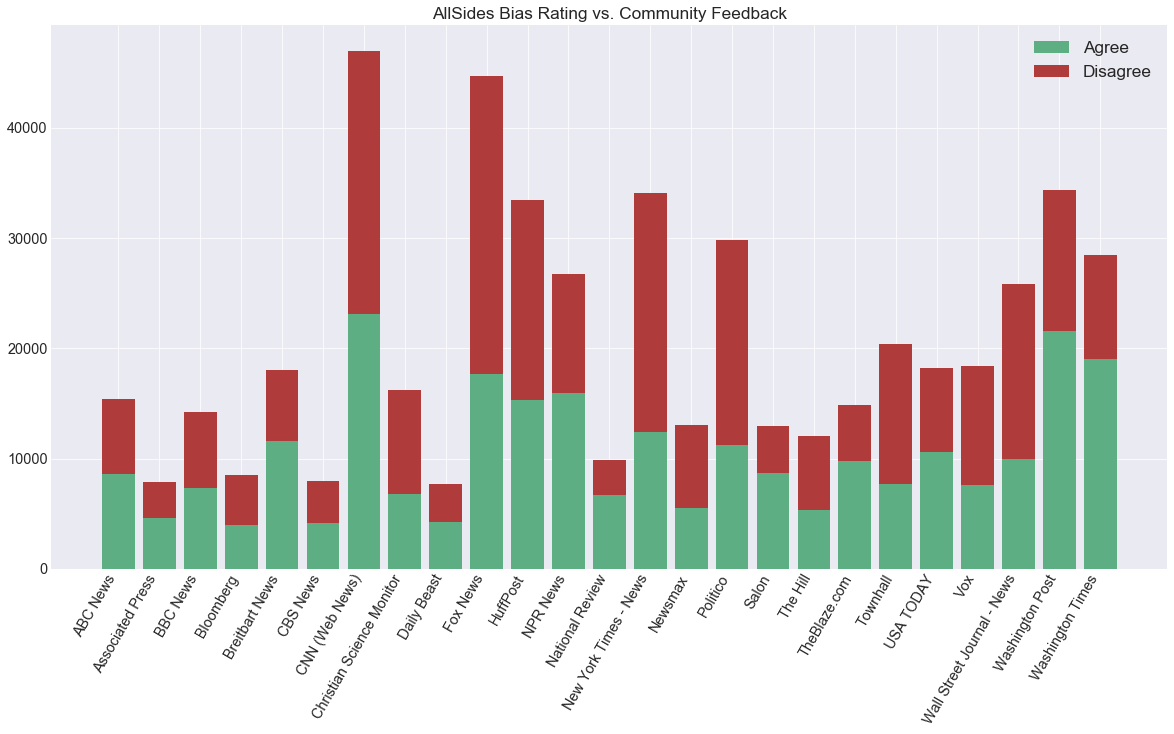

In [81]:
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(df2.index, df2['agree'], color='#5DAF83')
ax.bar(df2.index, df2['disagree'], bottom=df2['agree'], color='#AF3B3B')

ax.set_ylabel = 'Total feedback'

plt.yticks(fontsize='x-large')
plt.xticks(rotation=60, ha='right', fontsize='x-large')

plt.legend(['Agree', 'Disagree'], fontsize='xx-large')
plt.title('AllSides Bias Rating vs. Community Feedback', fontsize='xx-large')
plt.show()

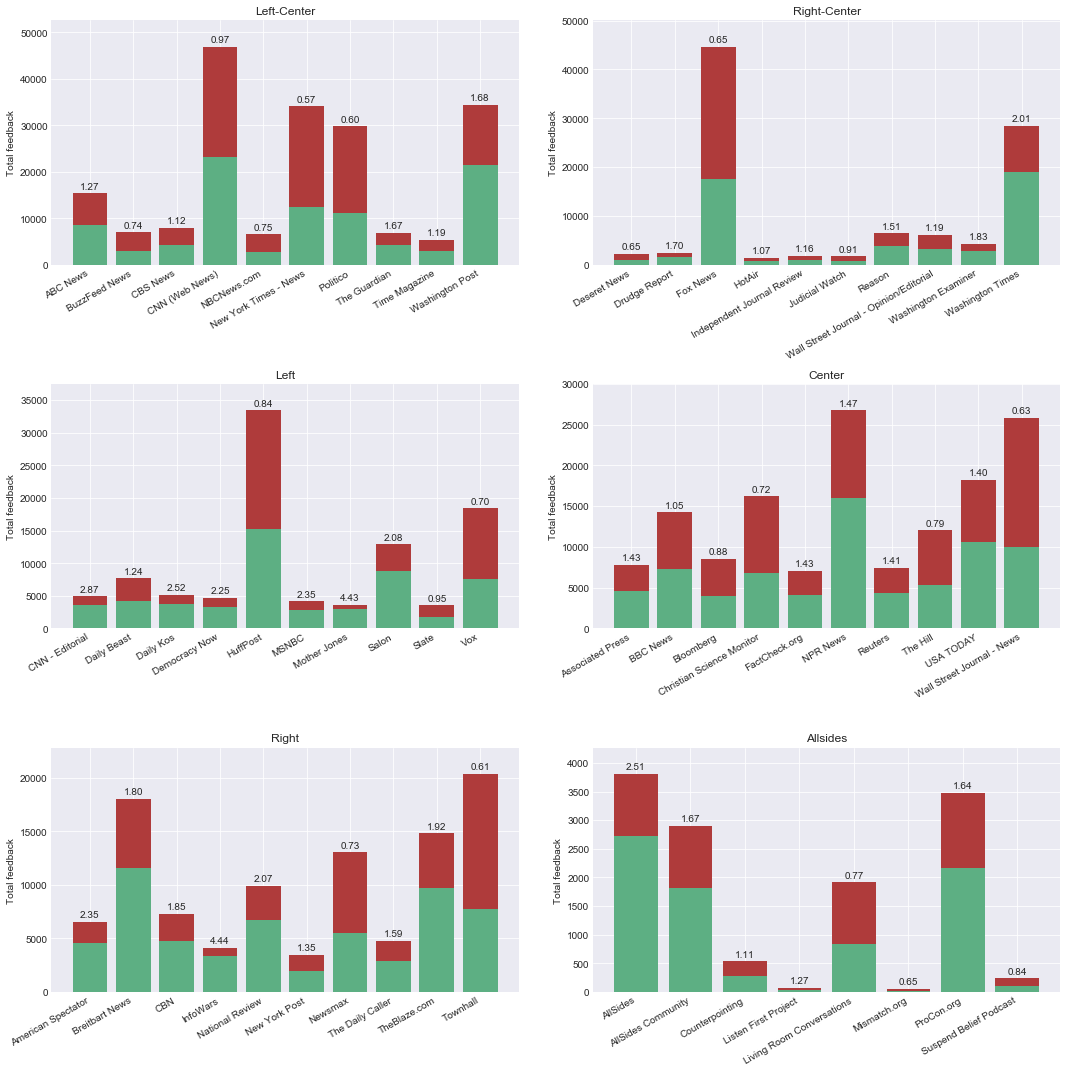

In [83]:
df3 = df.copy()
fig = plt.figure(figsize=(15,15))
biases = df3['bias'].unique()

for i,bias in enumerate(biases):
    temp_df = df3[df3['bias']==bias].iloc[:10]
    temp_df.sort_index(inplace=True)
    
    max_votes = temp_df['total_votes'].max()
    
    ax = fig.add_subplot(len(biases) / 2, 2, i + 1)
    
    ax.bar(temp_df.index, temp_df['agree'], color='#5DAF83')
    ax.bar(temp_df.index, temp_df['disagree'], bottom=temp_df['agree'], color='#AF3B3B')
    
    for x, y, ratio in zip(ax.get_xticks(), temp_df['total_votes'], temp_df['agree_ratio']):
        ax.text(x, y + (0.02 * max_votes), f"{ratio:.2f}", ha='center')
    
    ax.set_ylabel('Total feedback')
    ax.set_title(bias.title())
    
    ax.set_ylim(0, max_votes + (0.12 * max_votes))
    
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout(w_pad=3.0, h_pad=1.0)
plt.show()
